<a href="https://colab.research.google.com/github/anandhc6/Assignment1/blob/main/Confusion_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
     |████████████████████████████████| 181 kB 66.0 MB/s 
     |████████████████████████████████| 144 kB 80.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=2e275960d1eef0a7e9b2659eeb09ebd77c6f2bd99785c02145b7df687ca1e616
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
wandb.login()
#!wandb login --relogin
#wandb.init(project='CS6910_Assignment1_Sweep',entity="anandh", name = 'class-samples-1')

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import numpy as np
from numpy import random
from keras.datasets import fashion_mnist
#import the required libraries
from matplotlib import pyplot
import math as math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


(X, y), (X_test, y_test) = fashion_mnist.load_data()

# Reshaping the data 
X = X.reshape(X.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Normalizing
X = X/255.0
X_test = X_test/255.0

# Split the data X into a training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

#Layer dimensions
#la =[784,128,128,10]
#la=[784, 256, 256, 256, 10]
#la =[]
#L= len(la)-1  
#L=[]

#weights and bias empty initializing
np.random.seed(42)
params={}

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
def weight_initialize(weight_para,la):
    global params
    params ={}
    if weight_para == 'Xavier':
        for i in range(0,len(la)-1):
            params["W"+str(i)]=np.random.randn(la[i+1],la[i])*np.sqrt(2/la[i+1])
            params["b"+str(i)] = np.zeros((la[i+1], 1))
    if weight_para == 'random':
        for i in range(0,len(la)-1):
            params["W"+str(i)] = np.random.randn(la[i+1], la[i]) * 0.01
            params["b"+str(i)] = np.zeros((la[i+1], 1))

In [ ]:
#Activation function     
def sigmoid(x):
     return 1. /(1. + np.exp(-x))

def activation_function(x,activation):
    if activation=='sigmoid':
        return (1.0 / (1.0 + np.exp(-x)))
    elif activation=='sigmoid_derivative':
        return (activation_function(x,'sigmoid') * (1 - activation_function(x,'sigmoid')))
    elif activation=='relu':
        return x * (x > 0)
    elif activation=='relu_derivative':
        x[x <= 0.0] = 0.0
        x[x > 0.0] = 1.0
        return x
    elif activation=='tanh':
        return np.tanh(x)
    elif activation=='tanh_derivative':
        return 1 - (activation_function(x,'tanh') ** 2)
    else:
        raise Exception("Invalid activation function",activation)
def softmax(x):
    soft = np.zeros(x.shape)
    for i in range(0, x.shape[1]):
        numr = np.exp(x[:, i])
        soft[:, i] = numr/np.sum(numr)
    return soft


In [ ]:
def feedforward(X, params,activation_para):

    L = len(params)//2  
    A = [None]*L # activations
    H = [None]*L # pre-activations
     
    k=0
    A[0]=np.dot(params["W"+str(k)],X)+params["b"+str(k)]
    H[0]=activation_function(A[k],activation_para)
   
    for k in range(1,L-1):
            A[k]=np.dot(params["W"+str(k)],H[k-1])+params["b"+str(k)]
            H[k]=activation_function(A[k],activation_para)
   
    k=L-1
    A[k]=np.dot(params["W"+str(k)],H[k-1])+params["b"+str(k)]
    H[k]=softmax(A[k])
   
    y=H[-1]
    return A,H,y



In [ ]:

def back_propagation(X_train,y_train,params,A ,H,activation_para,loss):
    #Initialzing gradients
    L = len(params)//2
    #A = [None]*L # activations
    #H = [None]*L
    g_weights = [0]*L
    g_biases  = [0]*L
    g_a       = [0]*(L+1)
    g_h       = [0]*(L+1)
    n_samples = X_train.shape[0]  # Change depending on the dimensions of data
   
    # print(str(activation_para)+'_derivative')

    for k in range(L-1,-1,-1): #2,1,0
       
        if k == L-1:
            if loss == 'cross_entropy':
                g_a[k] = H[k]  - y_train  # keep or remove T depending on the dimensions of data
            elif loss == 'square_loss':
                g_a[k] = (H[k] - y_train) * H[k] * (1 - H[k])
           
       
        else:
            g_h[k] = (1/n_samples)*np.dot(params["W"+str(k+1)].T,g_a[k+1])
            if activation_para == 'sigmoid':
                g_a[k] = (1/n_samples)*np.multiply(g_h[k],activation_function(A[k], str(activation_para)+'_derivative'))
            elif activation_para == 'tanh':
                g_a[k] = (1/n_samples)*np.multiply(g_h[k],activation_function(A[k], str(activation_para)+'_derivative'))
            elif  activation_para == 'relu':
                g_a[k] = (1/n_samples)*np.multiply(g_h[k],activation_function(A[k], str(activation_para)+'_derivative'))


        if k == 0:
            g_weights[k] = (1/n_samples)*np.dot(g_a[k],X_train.T)
        else:
            g_weights[k] = (1/n_samples)*np.dot(g_a[k],H[k-1].T)

        g_biases[k]  = (1/n_samples)*np.sum(g_a[k], axis=1, keepdims = True)
    return g_weights,g_biases

In [ ]:
def accuracy(x, y,params,activation_para):
    _,_,yhate=feedforward(x, params,activation_para)
    yh=np.argmax(yhate,axis=0)
    accuracy = accuracy_score(y, yh)*100
    return accuracy
    #print(accuracy)

In [ ]:
def loss_accuracy(x,params,y,t,loss,activation_para, n_class=10):
    _,_,yhate=feedforward(x, params,activation_para)
    #print(x.shape)
    #print(y.shape)
    # ls=[]
    # accuracy=[]
    if loss == 'cross_entropy':
        one_hot = np.zeros((n_class, x.shape[1]))
        one_hot[y, np.array(list(range(x.shape[1])))] = 1
        ls= -np.sum(one_hot *np.log(yhate))/x.shape[1]
                  
    if loss == 'squared_loss':
        eIndicator = np.zeros((n_class, x.shape[1]))
        eIndicator[y, np.arange(x.shape[1])] = 1
        ls =np.sum((yhate - eIndicator)**2) / x.shape[1]
    
    yh=np.argmax(yhate,axis=0)
    accuracy = accuracy_score(y, yh)*100 
     
    # for p in range(len(ls)):
    #print("Accuracy of  = " + str(accuracy) +"  loss of " +str(t) +" = " + str(ls) )
    #print("Accuracy of " +str(t) +" = " + str(accuracy) )
    return accuracy,ls

In [ ]:
def vanillagd(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):
    t=0
    A=[]
    H=[]
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    while t<epochs:
        for i in range(0,minibatch,1):
                    X_mini=x_train[(i*batch):((i+1)*batch)]
                    y_mini=y_train[(i*batch):((i+1)*batch)]
                    batch1 = X_mini.shape[0]
       
                    y_mini_one_hot = np.zeros((10, batch1))
                    y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
                    A,H,y_hat= feedforward(X_mini.T,params,activation_para)
                    g_weights,g_biases = back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)
                    for j in range(0,L):
                      g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                      params['W'+str(j)]-=eta*g_weights[j]
                      params['b'+str(j)]-=eta*g_biases[j]
                   
        t+=1
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l)
     
    return train_acc,train_loss,val_acc,val_loss
       

In [ ]:
# MOMENTUM_GD optimizer 
        
def momentumGD(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):
    preW = {}
    preb = {}
    gamma = 0.9
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    for k in range(0,L):
        preW['W'+str(k)]=np.zeros((la[k+1],la[k]))
        preb['b'+str(k)]=np.zeros((la[k+1],1))
    t=0
    while t<epochs:
        for i in range(0,minibatch,1):
            X_mini=x_train[(i*batch):((i+1)*batch)]
            y_mini=y_train[(i*batch):((i+1)*batch)]
            batch1 = X_mini.shape[0]
            y_mini_one_hot = np.zeros((10, batch1))
            y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
            A,H,y_hat=feedforward(X_mini.T,params,activation_para)
            g_weights,g_biases = back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)
            for j in range(0,L):
                #g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                w=(gamma*preW['W'+str(j)])+eta*g_weights[j]
                b=(gamma*preb['b'+str(j)])+eta*g_biases[j]
                params['W'+str(j)]-=w-np.multiply(eta*weight_decay,params['W'+str(j)])
                params['b'+str(j)]-=b-np.multiply(eta*weight_decay,params['b'+str(j)])
                preW['W'+str(j)]=w
                preb['b'+str(j)]=b
        t+=1
        
        #Loss & accuracy
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l)
    return train_acc,train_loss,val_acc,val_loss


In [ ]:
#NAG optimizer  
       
def nag(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):
    t=0
    # batch=600
    gamma = 0.9
    preW={}
    preb={}
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    for k in range(0,L):
        preW['W'+str(k)]=np.zeros((la[k+1],la[k]))
        preb['b'+str(k)]=np.zeros((la[k+1],1))
        # print(preW['W'+str(k)].shape)
    while t<epochs:
        for i in range(0,minibatch,1):
            X_mini=x_train[(i*batch):((i+1)*batch)]
            y_mini=y_train[(i*batch):((i+1)*batch)]
            batch1 = X_mini.shape[0]
            y_mini_one_hot = np.zeros((10, batch1))
            y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
            A,H,y_hat=feedforward(X_mini.T,params,activation_para)
            g_weights,g_biases = back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)
            l_params={}
            for j in range(0,L):
                l_params['W'+str(j)]=params['W'+str(j)]-(gamma*preW['W'+str(j)])
                l_params['b'+str(j)]=params['b'+str(j)]-(gamma*preb['b'+str(j)])
            for j in range(0,L):
                g_weights,g_biases = back_propagation(X_mini.T,y_mini_one_hot,l_params,A ,H,activation_para,loss)
                #g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                w=(gamma*preW['W'+str(j)])+eta*g_weights[j]
                b=(gamma*preb['b'+str(j)])+eta*g_biases[j]
                params['W'+str(j)]-=w-np.multiply(eta*weight_decay,params['W'+str(j)])
                params['b'+str(j)]-=b-np.multiply(eta*weight_decay,params['b'+str(j)])
                preW['W'+str(j)]=w
                preb['b'+str(j)]=b
        t+=1
       
        #Loss & accuracy            
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l)
     
    return train_acc,train_loss,val_acc,val_loss
       

In [ ]:
#RMSprop optimizer
        
def rms(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):
    t=0
    gamma = 0.9
    eps = 1e-8
    beta = 0.9
    preW={}
    preb={}
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    for k in range(0,L):
        preW['W'+str(k)]=np.zeros((la[k+1],la[k]))
        preb['b'+str(k)]=np.zeros((la[k+1],1))
    while t<epochs:
        for i in range(0,minibatch,1):
            X_mini=X_train[(i*batch):((i+1)*batch)]
            y_mini=y_train[(i*batch):((i+1)*batch)]
            batch1 = X_mini.shape[0]
            y_mini_one_hot = np.zeros((10, batch1))
            y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
            A,H,y_hat=feedforward(X_mini.T,params,activation_para)
            g_weights,g_biases=back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)  
            for j in range(0,L):
                #g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                w=(beta*preW['W'+str(j)])+(1.0-beta)*(g_weights[j])**2
                b=(beta*preb['b'+str(j)])+(1.0-beta)*(g_biases[j])**2
                params['W'+str(j)]-=((eta/(np.sqrt(w+eps)))*g_weights[j])-np.multiply(eta*weight_decay,params['W'+str(j)])
                params['b'+str(j)]-=((eta/(np.sqrt(b+eps)))*g_biases[j])-np.multiply(eta*weight_decay,params['b'+str(j)])
                preW['W'+str(j)]=w
                preb['b'+str(j)]=b
        t+=1
        
        #Loss & accuracy
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l)
    
    return train_acc,train_loss,val_acc,val_loss


In [ ]:
#STOCHASTIC optimizer
       
def sgd(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):
    t=0
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    while t<epochs:
        indexes=np.random.permutation(len(x_train))
        X_ran=x_train[indexes]
        Y_ran=y_train[indexes]
        for x,y in zip(X_ran,Y_ran):
            X_mini=np.array([x])
            y_mini=np.array([y])
            batch1 = X_mini.shape[0]
            y_mini_one_hot = np.zeros((10, batch1))
            y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
            A,H,y_hat=feedforward(X_mini.T,params,activation_para)
            g_weights,g_biases=back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)
            for j in range(0,L):
                #g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                params['W'+str(j)]-=eta*g_weights[j]#-np.multiply(eta*weight_decay,params['W'+str(j)])
                params['b'+str(j)]-=eta*g_biases[j]#-np.multiply(eta*weight_decay,params['b'+str(j)])
        t+=1
       
        #Loss & accuracy
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l) 
    return train_acc,train_loss,val_acc,val_loss
     

In [ ]:
#ADAM optimizer
        
def adam(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):
    eps = 1e-8
    beta1 = 0.9
    beta2 = 0.999
    t=0
    preW={}
    preb={}
    mt={}
    vt={}
    it=0
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    for k in range(0,L):
        preW['W'+str(k)]=np.zeros((la[k+1],la[k]))
        preb['b'+str(k)]=np.zeros((la[k+1],1))
    for k in range(0,L):
        mt['W'+str(k)]=np.zeros((la[k+1],la[k]))
        vt['b'+str(k)]=np.zeros((la[k+1],1))
    while t<epochs:
        for i in range(0,minibatch,1):
            X_mini=x_train[(i*batch):((i+1)*batch)]
            y_mini=y_train[(i*batch):((i+1)*batch)]
            batch1 = X_mini.shape[0]
            y_mini_one_hot = np.zeros((10, batch1))
            y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
            A,H,y_hat=feedforward(X_mini.T,params,activation_para)
            g_weights,g_biases=back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)
            it+=1
            for j in range(0,L):
                #g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                mt['W'+str(j)]=beta1*mt['W'+str(j)]+(1-beta1)*g_weights[j]
                vt['b'+str(j)]=beta1*vt['b'+str(j)]+(1-beta1)*g_biases[j]
                preW['W'+str(j)]=beta2*preW['W'+str(j)]+(1-beta2)*(g_weights[j]**2)
                preb['b'+str(j)]=beta2*preb['b'+str(j)]+(1-beta2)*(g_biases[j]**2)
                mhatw=mt['W'+str(j)]/(1-(beta1)**it)
                mhatb=vt['b'+str(j)]/(1-(beta1)**it)
                vhatw=preW['W'+str(j)]/(1-(beta2)**it)
                vhatb=preb['b'+str(j)]/(1-(beta2)**it)
                params['W'+str(j)]-=((eta/(np.sqrt(vhatw+eps)))*mhatw)-np.multiply(eta*weight_decay,params['W'+str(j)])
                params['b'+str(j)]-=((eta/(np.sqrt(vhatb+eps)))*mhatb)-np.multiply(eta*weight_decay,params['b'+str(j)])
        t+=1
        
        #Loss & accuracy
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l)
     
    return train_acc,train_loss,val_acc,val_loss


In [ ]:
#NADAM optimizer
       
def nadam(x_train,y_train,x_val,y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L):

    #print('inside optimizer nadam')
    #print(la)
    eps = 1e-8
    beta1 = 0.9
    beta2 = 0.999
    t=0
    minibatch=math.ceil(x_train.shape[0]/batch)
    preW={}
    preb={}
    mt={}
    vt={}
    it=0
    train_acc=[]
    train_loss=[]
    val_acc=[]
    val_loss=[]
    for k in range(0,L):
        preW['W'+str(k)]=np.zeros((la[k+1],la[k]))
        preb['b'+str(k)]=np.zeros((la[k+1],1))
    for k in range(0,L):
        mt['W'+str(k)]=np.zeros((la[k+1],la[k]))
        vt['b'+str(k)]=np.zeros((la[k+1],1))
    while t<epochs:
        for i in range(0,minibatch,1):
            X_mini=x_train[(i*batch):((i+1)*batch)]
            y_mini=y_train[(i*batch):((i+1)*batch)]
            batch1 = X_mini.shape[0]
            y_mini_one_hot = np.zeros((10, batch1))
            y_mini_one_hot[y_mini, np.array(list(range(batch1)))] = 1
            A,H,y_hat=feedforward(X_mini.T,params,activation_para)
            g_weights,g_biases=back_propagation(X_mini.T,y_mini_one_hot,params,A ,H,activation_para,loss)
            it+=1
            for j in range(0,L):
                #g_weights[j]=g_weights[j]+weight_decay*params['W'+str(j)]
                mt['W'+str(j)]=beta1*mt['W'+str(j)]+(1-beta1)*g_weights[j]
                vt['b'+str(j)]=beta1*vt['b'+str(j)]+(1-beta1)*g_biases[j]
                preW['W'+str(j)]=beta2*preW['W'+str(j)]+(1-beta2)*(g_weights[j]**2)
                preb['b'+str(j)]=beta2*preb['b'+str(j)]+(1-beta2)*(g_biases[j]**2)
                mhatw=mt['W'+str(j)]/(1-(beta1)**it)
                mhatb=vt['b'+str(j)]/(1-(beta1)**it)
                vhatw=preW['W'+str(j)]/(1-(beta2)**it)
                vhatb=preb['b'+str(j)]/(1-(beta2)**it)
                mbarw=beta1*mhatw+(1.0-beta1)*g_weights[j]
                mbarb=beta1*mhatb+(1.0-beta1)*g_biases[j]
                params['W'+str(j)]-=((eta/(np.sqrt(vhatw+eps)))*mbarw)-np.multiply(eta*weight_decay,params['W'+str(j)])
                params['b'+str(j)]-=((eta/(np.sqrt(vhatb+eps)))*mbarb)-np.multiply(eta*weight_decay,params['b'+str(j)])
        t+=1
       
        #Loss & accuracy
    
        train_a,train_l = loss_accuracy(x_train.T, params, y_train, t, loss,activation_para)
        train_acc.append(train_a)
        train_loss.append(train_l)
        val_a,val_l = loss_accuracy(x_val.T, params, y_val, t, loss,activation_para)  
        val_acc.append(val_a)
        val_loss.append(val_l)
    return train_acc,train_loss,val_acc,val_loss
       

In [ ]:
#FIT models        
def fit(X,y,batch,epochs,eta,weight_para,optimiser,loss,weight_decay,activation_para,la,L):      
    weight_para = 'Xavier'
    weight_initialize(weight_para,la)
    
    X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    
    #batch=100
    
    minibatch=math.ceil(X_train.shape[0]/batch)
    
    if optimiser=='momentumGD':
        print('calling optimizer momentum ')
        train_acc,train_loss,val_acc,val_loss=momentumGD(X_train,y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)
    elif optimiser=='nadam':
        print('calling optimizer nadam ')
        train_acc,train_loss,val_acc,val_loss=nadam(X_train,Y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)
    elif optimiser=='rms':
        print('calling optimizer rms ')
        train_acc,train_loss,val_acc,val_loss=rms(X_train,Y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)
    elif optimiser=='sgd':
        print('calling optimizer sgd ')
        train_acc,train_loss,val_acc,val_loss=sgd(X_train,Y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)
    elif optimiser=='adam':
        print('calling optimizer adam ')
        train_acc,train_loss,val_acc,val_loss=adam(X_train,Y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)
    elif optimiser=='nag':
        print('calling optimizer nag ')
        train_acc,train_loss,val_acc,val_loss=nag(X_train,Y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)
    elif optimiser=='vanillagd':
        train_acc,train_loss,val_acc,val_loss=vanillagd(X_train,Y_train,X_val,Y_val,eta,epochs,minibatch,batch,loss,weight_decay,activation_para,la,L)   
    
    return train_acc,train_loss,val_acc,val_loss

#la=[784,256,256,10]
#L=len(la)-1         
#train_acc,train_loss,val_acc,val_loss= fit(X,y,100,5,0.01,'Xavier','nadam','cross_entropy',0,'tanh',la,L)

#print(train_acc,train_loss,val_acc,val_loss)

In [ ]:
features=784
n_class=10
loss='cross_entropy'
#la=[]
#L=0
#print("calling FF_fit")
def FF_fit():
    """
    This function is used for the hyperparameter tuning using wandb sweeps
    """
    # Default values for hyper-parameters
    config_defaults = {
        'epochs': 10,
        'batch': 64,
        'eta': 1e-3,
        'activation_para': 'relu',
        'optimiser': 'adam',
        'weight_para': 'Xavier',
        'weight_decay': 0,
        'no_of_neurons': 64,
        'no_of_hidden': 3
    }
    
    la=[]
    L=0
    #wandb.init()
    wandb.init(config=config_defaults)
    config = wandb.config
    
    no_of_neurons = config.no_of_neurons
    no_of_hidden = config.no_of_hidden
    weight_para = config.weight_para
    epochs = config.epochs
    batch = config.batch
    eta = config.eta
    activation_para = config.activation_para
    weight_decay = config.weight_decay
    optimiser = config.optimiser
    
    
    la =[features]+[no_of_neurons]*no_of_hidden+[n_class]
    print(la)
    L =len(la)-1
    
    name = "lr_"+str(config.eta)+"_hl_"+str(config.no_of_hidden)+"_bs_"+str(config.batch)+"_ac_"+str(config.activation_para)+"_ep_"+str(config.epochs)
    wandb.run.name = name
    # name = "lr_{}_af_{}_in_{}_op_{}_b_{}_wd_{}_ep_{}_nn_{}_nh_{}".format(eta, activation_para, weight_para, optimiser, batch, weight_decay, epochs, no_of_neurons, no_of_hidden)
    # print(name)
    # fit(X,y,100,5,0.01,'Xavier','nadam','cross_entropy',0.0005,'tanh')
    train_acc,train_loss,val_acc,val_loss=fit(X,y,batch,epochs,eta,weight_para,optimiser,loss,weight_decay,activation_para,la,L)

    #printing Accuracy and loss
    for p in range(len(train_acc)):
       print("Accuracy of  train= " + str(train_acc[p]) +"   Loss of train = " + str(train_loss[p]) + "   Accuracy of val= " + str(val_acc[p]) + "  Accuracy of val= " + str(val_loss[p]))

    test_acc=accuracy(X_test.T,y_test,params,activation_para)
    print("Accuracy of  test_data= " + str(test_acc))

    for i in range(len(train_acc)):
      wandb.log({'train_acc':train_acc[i], 'train_loss':train_loss[i], 'val_acc':val_acc[i] ,'val_loss':val_loss[i], 'epochs': i+1})
    wandb.log({'test_acc' : test_acc})
    wandb.run.save()
    wandb.run.finish()
    
sweep_config = {
    'method': 'bayes', #grid, random
    'metric': {
      'name': 'val_loss',
      'goal': 'minimize'   
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
        'no_of_hidden': {
            'values': [2,3,4]
        },
        'no_of_neurons': {
            'values': [128,256]
        },
        'weight_decay': {
            'values': [0,0.0005]
        },
        'eta': {
            'values': [ 0.01,0.001]
        },
        'optimiser': {
            'values': ['sgd', 'momentumGD', 'nag', 'rms', 'adam','nadam']
        },
        'batch':{
            'values': [16,32,64,100]
        },
        'weight_para':{
            'values': ['random','Xavier']
        },
        'activation_para': {
            'values': ['tanh','sigmoid', 'relu']
        }
    }
}
    
#wandb.init(project='cs6910-assignment1', name = 'class-samples-1')
#wandb.init(entity="anandh", project = "CS6910_Assignment1_Sweep")
#sweep_id=wandb.sweep(sweep_config,entity="anandh", project = "CS6910_Assignment1_Sweep")
sweep_id= "meo8511v"
#%start wandb sweep
#wandb.agent(sweep_id, FF_fit, count = 20)
wandb.agent(sweep_id, FF_fit, entity="anandh", project = "CS6910_Assignment1_Sweep", count = 20)


wandb: Agent Starting Run: z6hl2ec7 with config:
wandb: 	activation_para: tanh
wandb: 	batch: 32
wandb: 	epochs: 10
wandb: 	eta: 0.001
wandb: 	no_of_hidden: 4
wandb: 	no_of_neurons: 256
wandb: 	optimiser: adam
wandb: 	weight_decay: 0
wandb: 	weight_para: Xavier


[784, 256, 256, 256, 256, 10]
calling optimizer adam 
Accuracy of  train= 74.42407407407407   Loss of train = 0.7394889922805827   Accuracy of val= 74.21666666666667  Accuracy of val= 0.7417797340626835
Accuracy of  train= 78.32222222222222   Loss of train = 0.6141803888471054   Accuracy of val= 78.23333333333333  Accuracy of val= 0.6170891221125073
Accuracy of  train= 80.02592592592592   Loss of train = 0.5637789564812399   Accuracy of val= 79.60000000000001  Accuracy of val= 0.5678411213095383
Accuracy of  train= 80.95   Loss of train = 0.5358515154017138   Accuracy of val= 80.35  Accuracy of val= 0.5412816348734316
Accuracy of  train= 81.59814814814816   Loss of train = 0.5177646787367984   Accuracy of val= 81.15  Accuracy of val= 0.5245516285021142
Accuracy of  train= 82.10185185185185   Loss of train = 0.5049163587822539   Accuracy of val= 81.65  Accuracy of val= 0.5129519086442427
Accuracy of  train= 82.41851851851851   Loss of train = 0.49521410638000646   Accuracy of val= 82.01

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Accuracy of  test_data= 81.49


epochs,▁▂▃▃▄▅▆▆▇█
test_acc,▁
train_acc,▁▄▆▆▇▇████
train_loss,█▅▃▃▂▂▂▁▁▁
val_acc,▁▄▆▆▇▇████
val_loss,█▅▃▂▂▂▁▁▁▁
epochs,10
test_acc,81.49
train_acc,82.98519
train_loss,0.47613
val_acc,82.58333


wandb: Agent Starting Run: i9b85tzr with config:
wandb: 	activation_para: tanh
wandb: 	batch: 16
wandb: 	epochs: 10
wandb: 	eta: 0.001
wandb: 	no_of_hidden: 3
wandb: 	no_of_neurons: 128
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_para: random


[784, 128, 128, 128, 10]
calling optimizer nadam 
Accuracy of  train= 74.87777777777778   Loss of train = 0.7091614099332547   Accuracy of val= 75.11666666666666  Accuracy of val= 0.7071001905222878
Accuracy of  train= 77.9   Loss of train = 0.6243856888067725   Accuracy of val= 77.96666666666667  Accuracy of val= 0.6242729839905564
Accuracy of  train= 79.19444444444444   Loss of train = 0.5907880878582522   Accuracy of val= 78.86666666666666  Accuracy of val= 0.5923419412483499
Accuracy of  train= 79.82222222222222   Loss of train = 0.5721328347071604   Accuracy of val= 79.58333333333333  Accuracy of val= 0.5748441522401465
Accuracy of  train= 80.21111111111111   Loss of train = 0.5600829038632575   Accuracy of val= 80.05  Accuracy of val= 0.5636244475399835
Accuracy of  train= 80.4888888888889   Loss of train = 0.5515707819768088   Accuracy of val= 80.21666666666667  Accuracy of val= 0.5557354214715208
Accuracy of  train= 80.67222222222222   Loss of train = 0.5451894148630899   Accur

epochs,▁▂▃▃▄▅▆▆▇█
test_acc,▁
train_acc,▁▄▆▇▇▇████
train_loss,█▅▃▃▂▂▁▁▁▁
val_acc,▁▅▆▇▇▇▇███
val_loss,█▅▃▃▂▂▁▁▁▁
epochs,10
test_acc,79.86
train_acc,81.02407
train_loss,0.53285
val_acc,80.73333


wandb: Agent Starting Run: jca9wxuj with config:
wandb: 	activation_para: tanh
wandb: 	batch: 16
wandb: 	epochs: 10
wandb: 	eta: 0.001
wandb: 	no_of_hidden: 3
wandb: 	no_of_neurons: 128
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_para: random


[784, 128, 128, 128, 10]
calling optimizer nadam 
Accuracy of  train= 75.48518518518519   Loss of train = 0.6987559401314745   Accuracy of val= 74.88333333333334  Accuracy of val= 0.7004138332036052
Accuracy of  train= 77.90370370370371   Loss of train = 0.6233353345289007   Accuracy of val= 77.28333333333333  Accuracy of val= 0.6323273903705718
Accuracy of  train= 78.83703703703704   Loss of train = 0.5946096705831327   Accuracy of val= 77.93333333333334  Accuracy of val= 0.6069690609240246
Accuracy of  train= 79.3648148148148   Loss of train = 0.5780869903233478   Accuracy of val= 78.63333333333333  Accuracy of val= 0.592477270169314
Accuracy of  train= 79.71851851851852   Loss of train = 0.5668448974279872   Accuracy of val= 79.06666666666666  Accuracy of val= 0.5826298531945937
Accuracy of  train= 80.00185185185185   Loss of train = 0.5585025950667729   Accuracy of val= 79.4  Accuracy of val= 0.5753311268026468
Accuracy of  train= 80.26111111111112   Loss of train = 0.5519811238549

epochs,▁▂▃▃▄▅▆▆▇█
test_acc,▁
train_acc,▁▄▆▆▇▇▇███
train_loss,█▅▃▃▂▂▂▁▁▁
val_acc,▁▄▅▆▇▇████
val_loss,█▅▃▃▂▂▂▁▁▁
epochs,10
test_acc,79.31
train_acc,80.69444
train_loss,0.53863
val_acc,79.86667


wandb: Agent Starting Run: renuxkip with config:
wandb: 	activation_para: tanh
wandb: 	batch: 16
wandb: 	epochs: 10
wandb: 	eta: 0.001
wandb: 	no_of_hidden: 3
wandb: 	no_of_neurons: 128
wandb: 	optimiser: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_para: random


[784, 128, 128, 128, 10]
calling optimizer adam 
Accuracy of  train= 73.40185185185184   Loss of train = 0.7333756956189301   Accuracy of val= 73.21666666666667  Accuracy of val= 0.7435048768920306
Accuracy of  train= 75.96111111111111   Loss of train = 0.6566669833996522   Accuracy of val= 76.1  Accuracy of val= 0.6628750951266924
Accuracy of  train= 77.09814814814816   Loss of train = 0.6241647665570779   Accuracy of val= 77.06666666666668  Accuracy of val= 0.6298379014640337
Accuracy of  train= 77.86296296296297   Loss of train = 0.6050739443076902   Accuracy of val= 77.98333333333333  Accuracy of val= 0.6106112952299313
Accuracy of  train= 78.37037037037037   Loss of train = 0.592172297737799   Accuracy of val= 78.60000000000001  Accuracy of val= 0.5976239194739951
Accuracy of  train= 78.79444444444445   Loss of train = 0.5827260305349055   Accuracy of val= 79.10000000000001  Accuracy of val= 0.5881038417220968
Accuracy of  train= 79.0537037037037   Loss of train = 0.57543573721737

epochs,▁▂▃▃▄▅▆▆▇█
test_acc,▁
train_acc,▁▄▅▆▇▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_acc,▁▄▅▆▇▇████
val_loss,█▅▄▃▂▂▂▁▁▁
epochs,10
test_acc,78.6
train_acc,79.65185
train_loss,0.56074
val_acc,79.63333


wandb: Agent Starting Run: 3kcfo0xz with config:
wandb: 	activation_para: sigmoid
wandb: 	batch: 16
wandb: 	epochs: 10
wandb: 	eta: 0.001
wandb: 	no_of_hidden: 4
wandb: 	no_of_neurons: 256
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_para: random


[784, 256, 256, 256, 256, 10]
calling optimizer nadam 
Accuracy of  train= 14.46111111111111   Loss of train = 2.3005187133332745   Accuracy of val= 14.249999999999998  Accuracy of val= 2.299158282021777
Accuracy of  train= 18.053703703703704   Loss of train = 2.275599824121737   Accuracy of val= 17.916666666666668  Accuracy of val= 2.2746024653153456
Accuracy of  train= 19.166666666666668   Loss of train = 2.2508580973175705   Accuracy of val= 19.366666666666667  Accuracy of val= 2.250212264864728
Accuracy of  train= 23.86111111111111   Loss of train = 2.2262401185452867   Accuracy of val= 23.666666666666668  Accuracy of val= 2.2259405808522135
Accuracy of  train= 28.344444444444445   Loss of train = 2.2017552884499785   Accuracy of val= 27.916666666666668  Accuracy of val= 2.2017967678955563
Accuracy of  train= 31.203703703703706   Loss of train = 2.177414921424538   Accuracy of val= 30.683333333333334  Accuracy of val= 2.177791887872071
Accuracy of  train= 33.73888888888889   Loss o

epochs,▁▂▃▃▄▅▆▆▇█
test_acc,▁
train_acc,▁▂▂▄▅▆▇▇██
train_loss,█▇▆▆▅▄▃▃▂▁
val_acc,▁▂▃▄▅▆▇▇██
val_loss,█▇▆▆▅▄▃▃▂▁
epochs,10
test_acc,38.85
train_acc,38.96667
train_loss,2.08171
val_acc,38.1


wandb: Agent Starting Run: d1fndn81 with config:
wandb: 	activation_para: sigmoid
wandb: 	batch: 64
wandb: 	epochs: 10
wandb: 	eta: 0.01
wandb: 	no_of_hidden: 3
wandb: 	no_of_neurons: 128
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_para: Xavier


[784, 128, 128, 128, 10]
calling optimizer nadam 
Accuracy of  train= 44.974074074074075   Loss of train = 1.8558842903045034   Accuracy of val= 44.516666666666666  Accuracy of val= 1.8612509856511104
Accuracy of  train= 57.25   Loss of train = 1.5517230166915497   Accuracy of val= 57.099999999999994  Accuracy of val= 1.5611534223512178
Accuracy of  train= 61.798148148148144   Loss of train = 1.3585234961386006   Accuracy of val= 61.71666666666666  Accuracy of val= 1.3702553026664046
Accuracy of  train= 64.98703703703703   Loss of train = 1.2256183669520764   Accuracy of val= 65.06666666666666  Accuracy of val= 1.238859396773104
Accuracy of  train= 67.45925925925927   Loss of train = 1.1292807199154056   Accuracy of val= 67.33333333333333  Accuracy of val= 1.1435816446524831
Accuracy of  train= 69.15185185185186   Loss of train = 1.0567307723165527   Accuracy of val= 68.75  Accuracy of val= 1.0718118779747776
Accuracy of  train= 70.21481481481482   Loss of train = 1.0003975993869851   

epochs,▁▂▃▃▄▅▆▆▇█
test_acc,▁
train_acc,▁▄▅▆▇▇████
train_loss,█▆▄▃▃▂▂▁▁▁
val_acc,▁▄▆▆▇▇████
val_loss,█▆▄▃▃▂▂▁▁▁
epochs,10
test_acc,70.9
train_acc,71.79074
train_loss,0.88868
val_acc,71.23333


wandb: Agent Starting Run: tne4ty92 with config:
wandb: 	activation_para: tanh
wandb: 	batch: 16
wandb: 	epochs: 10
wandb: 	eta: 0.001
wandb: 	no_of_hidden: 4
wandb: 	no_of_neurons: 256
wandb: 	optimiser: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_para: Xavier


[784, 256, 256, 256, 256, 10]
calling optimizer nadam 


In [ ]:
from keras.datasets import mnist
(X_mnist_full, y_mnist_full), (X_test_mnist_full, y_test_mnist_full) = mnist.load_data()

# Reshaping the data 
X_mnist_full = X_mnist_full.reshape(X_mnist_full.shape[0], 784)
X_test_mnist_full = X_test_mnist_full.reshape(X_test_mnist_full.shape[0], 784)

# Normalizing
X_mnist_full = X_mnist_full/255.0
X_test_mnist_full = X_test_mnist_full/255.0

#layer_dimensions
la_mnist_full=[784, 256, 256, 256, 256, 10]
L_mnist_full= len(la_mnist_full)-1

params={}

# Split the data X into a training set and validation set
X_train_mnist_full, X_val_mnist_full, y_train_mnist_full, y_val_mnist_full = train_test_split(X_mnist_full, y_mnist_full, test_size=0.1, random_state=42)

train_acc_mnist_full,train_loss_mnist_full,val_acc_mnist_full,val_loss_mnist_full= fit(X_mnist_full,y_mnist_full,32,10,0.01,'Xavier','nadam','cross_entropy',0,'tanh',la_mnist_full,L_mnist_full)
test_acc=accuracy(X_test_mnist_full.T,y_test_mnist_full,params,'tanh')
print("Accuracy of  test_data= " + str(test_acc))
#train_acc,train_loss,val_acc,val_loss=fit(X,y,batch,epochs,eta,weight_para,optimiser,loss,weight_decay,activation_para)

#printing Accuracy and loss
# for p in range(train_acc_mnist_full):
#   print("Accuracy of  train= " + str(train_acc_mnist_full[p]) +"Loss of train = " + str(train_loss_mnist_full[p]) + "Accuracy of val=" + str(val_acc_mnist_full[p]) + "Accuracy of val=" + str(val_loss_mnist_full[p]))

   

11501568/11490434 [==============================] - 0s 0us/step
calling optimizer nadam 
Accuracy of  test_data= 89.29


CONFUSION MATRIX

In [ ]:
def accuracy_conf(x, y,params,activation_para):
    _,_,yhate=feedforward(x, params,activation_para)
    yh=np.argmax(yhate,axis=0)
    return yh

calling optimizer nadam 


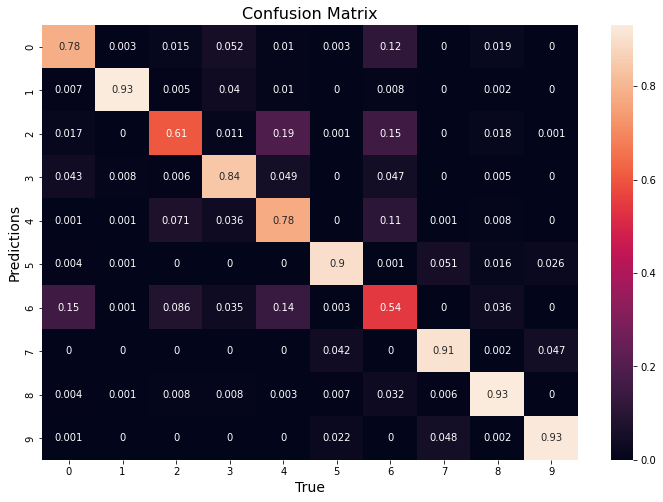

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
la=[784,256,256,256,256,10]
L=len(la)-1
#X,y,batch,epochs,eta,weight_para,optimiser,loss,weight_decay,activation_para,la,L
train_acc,train_loss,val_acc,val_loss=fit(X,y,16,10,0.001,'Xavier','nadam','cross_entropy',0.0005,'tanh',la,L)
test_acc_conf=accuracy_conf(X_test.T,y_test,params,'tanh')
#print("Accuracy of  test_data= " + str(test_acc_conf))
wandb.init(project='CS6910_Assignment1_Sweep',name='Confusion_matrix')
conf_matrix = confusion_matrix(y_test, test_acc_conf, normalize='true')
plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_matrix, annot=True)#,xticklabels=class_names, yticklabels=class_names)
ax.set_title("Confusion Matrix", size=16)
ax.set_xlabel("True", size=14)
ax.set_ylabel("Predictions", size=14)
plt.savefig("Confusion")
wandb.log({"Confusion matrix":wandb.Image(plt)})
plt.show()
wandb.finish()